<a href="https://colab.research.google.com/github/malibb/1.-perfil/blob/ramaMali/Ejercicio_DevF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Acceso a los datos

In [ ]:
#acceder a drive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Llegar al folder que contiene los archivos csv e y v
%cd gdrive/MyDrive/Devf/


/content/gdrive/MyDrive/Devf


#1. Exploracion de datos

In [ ]:
#Librerias
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#Leer archivos csv 
df_e = pd.read_csv('e.csv')
df_v = pd.read_csv('v.csv')

<h3>Primera vista</h3>

In [ ]:
#exploracion de e
df_e.head()

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
0,1,00:00:00:6a:17:ce,1,11,2,Wednesday,0,True,2676
1,2,00:00:00:6a:17:ce,1,11,2,Wednesday,1,True,2676
2,3,00:00:00:6a:78:ae,1,10,30,Sunday,20,False,0
3,4,00:00:02:fa:9c:12,1,11,13,Sunday,12,True,2272
4,5,00:00:08:7d:e2:58,3,11,4,Friday,19,False,0


In [ ]:
df_e = df_e[['device_mac','branch_office','month_tz','day_tz','day_of_week_tz','hour_tz','visitor','tiempodeses']]

In [ ]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249556 entries, 0 to 249555
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   device_mac      249556 non-null  object
 1   branch_office   249556 non-null  int64 
 2   month_tz        249556 non-null  int64 
 3   day_tz          249556 non-null  int64 
 4   day_of_week_tz  249556 non-null  object
 5   hour_tz         249556 non-null  int64 
 6   visitor         249556 non-null  bool  
 7   tiempodeses     249556 non-null  int64 
dtypes: bool(1), int64(5), object(2)
memory usage: 13.6+ MB


<h3> Vacios</h3>

In [ ]:
#existe algun null
df_e.isnull().any().any()

False

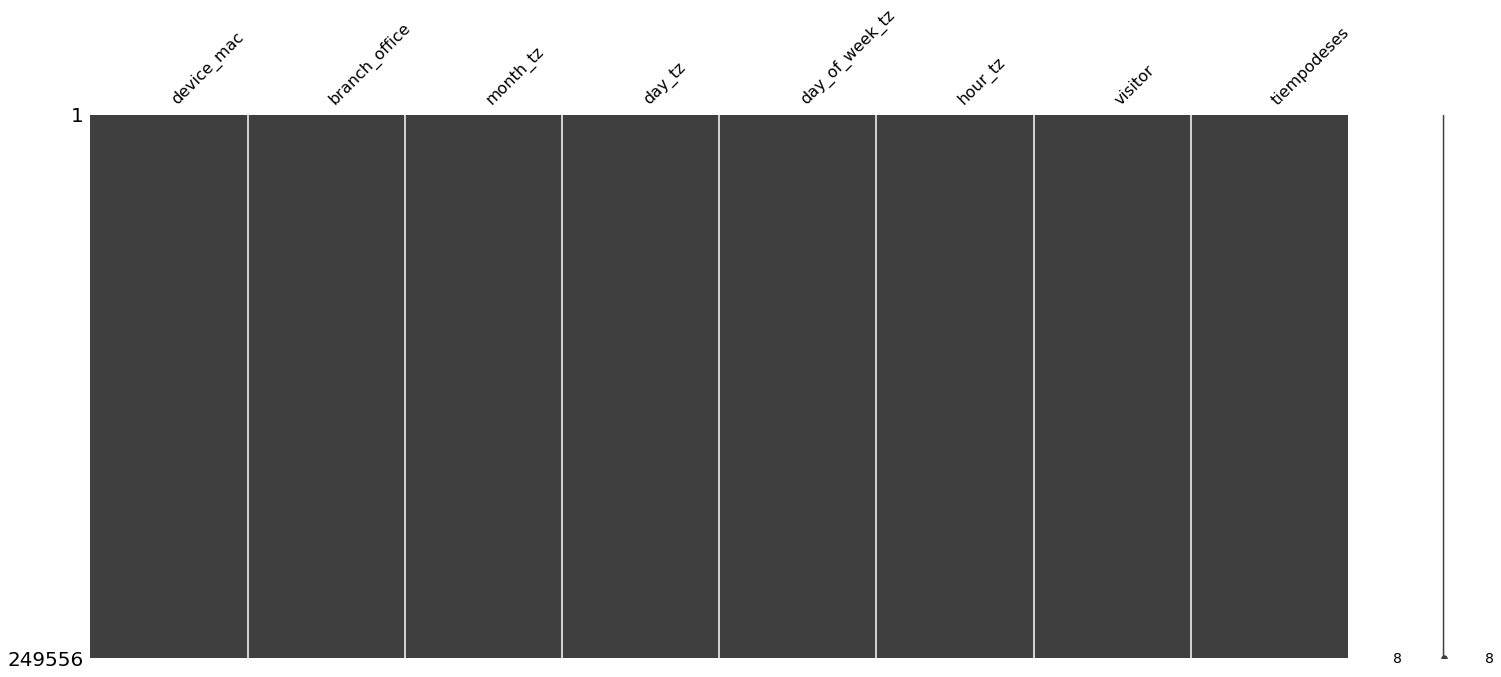

In [ ]:
#https://towardsdatascience.com/visualize-missing-values-with-missingno-ad4d938b00a1

msno.matrix(df_e)

In [ ]:
df_e.describe()

,branch_office,month_tz,day_tz,hour_tz,tiempodeses
count,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000
mean,1.884339,10.875619,14.802581,13.637468,2374.752244
std,0.942488,0.330016,9.466301,5.273697,8058.886022
min,1.000000,10.000000,1.000000,0.000000,0.000000
25%,1.000000,11.000000,7.000000,10.000000,0.000000
50%,1.000000,11.000000,13.000000,14.000000,0.000000
75%,3.000000,11.000000,24.000000,18.000000,421.000000
max,3.000000,11.000000,31.000000,23.000000,68062.000000


In [ ]:
df_e.agg(['count', 'size', 'nunique','unique'])

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
count,249556,249556,249556,249556,249556,249556,249556,249556
size,249556,249556,249556,249556,249556,249556,249556,249556
nunique,125252,3,2,27,7,24,2,10586
unique,"[00:00:00:6a:17:ce, 00:00:00:6a:78:ae, 00:00:0...","[1, 3, 2]","[11, 10]","[2, 30, 13, 4, 3, 5, 19, 8, 9, 28, 16, 29, 31,...","[Wednesday, Sunday, Friday, Thursday, Saturday...","[0, 1, 20, 12, 19, 5, 17, 16, 11, 6, 7, 9, 14,...","[True, False]","[2676, 0, 2272, 332, 14, 484, 912, 726, 3475, ..."


In [ ]:
#Dato recurrente desconocido con MAC ADDRESS 'lon' con 444-445 registros
df_e.device_mac.value_counts()

00:20:00:94:8e:d3    489
64:66:b3:ba:6d:fc    459
68:b5:99:8d:05:07    446
lon                  445
00:23:68:b2:58:a7    420
                    ... 
60:be:b5:94:20:71      1
58:48:22:c0:1a:82      1
e4:58:b8:e4:77:8d      1
e4:92:fb:d3:37:28      1
bc:e5:9f:50:62:28      1
Name: device_mac, Length: 125252, dtype: int64

In [ ]:
#agregamos columna con fecha
year = 2016
df_e['Date']=pd.to_datetime({'year': [year] * df_e.shape[0],
                           'month': df_e['month_tz'],
                           'day': df_e['day_tz']
                           })
#agregamos columna con fecha y hora

df_e['DateTime'] = df_e['Date'] + pd.to_timedelta(df_e['hour_tz'], 'h') 

<h3>Visitantes?</h3>

In [ ]:
#Cuanto nos visitan?

In [ ]:
df_e['visitor'].value_counts(normalize=True)

False    0.658417
True     0.341583
Name: visitor, dtype: float64

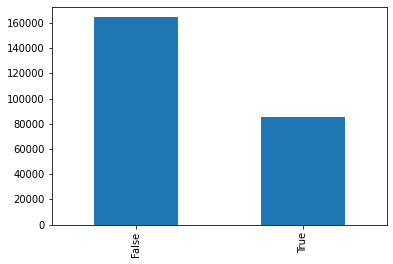

In [ ]:
%matplotlib inline
df_e['visitor'].value_counts().plot(kind="bar")

In [ ]:
df_e['branch_office'].value_counts(normalize=True)

1    0.508659
3    0.392998
2    0.098343
Name: branch_office, dtype: float64

In [ ]:
#crear conjunto de datos de solo visitantes

In [ ]:
df_e_visitors = df_e.loc[df_e['visitor'] == True]

In [ ]:
df_e_visitors.head()

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses,Date,DateTime
0,00:00:00:6a:17:ce,1,11,2,Wednesday,0,True,2676,2016-11-02,2016-11-02 00:00:00
1,00:00:00:6a:17:ce,1,11,2,Wednesday,1,True,2676,2016-11-02,2016-11-02 01:00:00
3,00:00:02:fa:9c:12,1,11,13,Sunday,12,True,2272,2016-11-13,2016-11-13 12:00:00
11,00:02:0d:76:45:e2,1,11,28,Monday,19,True,332,2016-11-28,2016-11-28 19:00:00
12,00:02:0e:94:a1:a5,1,11,16,Wednesday,20,True,14,2016-11-16,2016-11-16 20:00:00


In [ ]:
#Confirmo que el 100% de datos es de visitantes
df_e_visitors['visitor'].value_counts(normalize=True)

True    1.0
Name: visitor, dtype: float64

In [ ]:
#A donde nos visitan?

In [ ]:
#Popularidad en las sucursales en porcentaje (%)
df_e_visitors['branch_office'].value_counts(normalize=True)

1    0.528037
3    0.313101
2    0.158862
Name: branch_office, dtype: float64

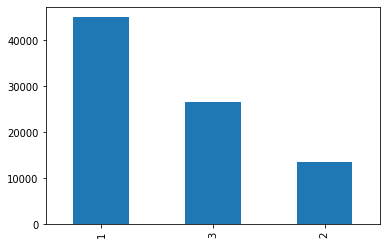

In [ ]:
%matplotlib inline
df_e_visitors['branch_office'].value_counts().plot(kind="bar")

In [ ]:
#Popularidad en las sucursales en cantidad de visitas (#)
df_e_visitors.branch_office.value_counts()

1    45012
3    26690
2    13542
Name: branch_office, dtype: int64

In [ ]:
#Cuando nos visitan?

In [ ]:
df_e_visitors['month_tz'].value_counts(normalize=True)

11    0.864049
10    0.135951
Name: month_tz, dtype: float64

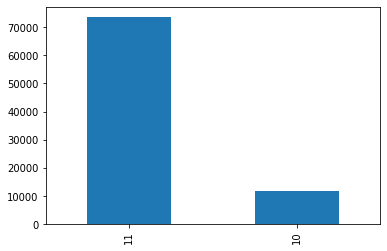

In [ ]:
df_e_visitors['month_tz'].value_counts().plot(kind="bar")

In [ ]:
df_e_visitors.month_tz.value_counts()

11    73655
10    11589
Name: month_tz, dtype: int64

In [ ]:
#En serio Noviembre arraso con el marcador de popularidad?
#Dudemos y validemoslo! ( 👁 ͜ʖ 👁) | づ￣ 3￣)づ

In [ ]:
df_e_visitors.agg(['count', 'size', 'nunique'])

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses,Date,DateTime
count,85244,85244,85244,85244,85244,85244,85244,85244,85244,85244
size,85244,85244,85244,85244,85244,85244,85244,85244,85244,85244
nunique,27439,3,2,27,7,24,1,10586,32,676


In [ ]:
#Identificar cuantos dias hay octubre y noviembre
#Aparentemente de octubre solo se tienen datos de 8 dias, (del 24 al 31)
#y de noviembre 24 dias (del 1 al 30 pero con dias faltantes)
df_e_visitors.groupby('month_tz').agg(['count', 'size', 'nunique']).stack()

device_mac  branch_office  ...   Date  DateTime
month_tz                                     ...                 
10       count         11589          11589  ...  11589     11589
         size          11589          11589  ...  11589     11589
         nunique        5165              1  ...      8       180
11       count         73655          73655  ...  73655     73655
         size          73655          73655  ...  73655     73655
         nunique       23905              3  ...     24       496

[6 rows x 9 columns]

In [ ]:
#df_e_visitors.day_tz.value_counts()

In [ ]:
#Por que de Octubre (10) solo 8 dias unicos y de Noviembre (11) solo 24?
#Que dias me hacen falta?

In [ ]:
#Crear los 2 subconjuntos de datos de octubre y noviembre
df_e_visitors_oct = df_e_visitors.loc[df_e_visitors['month_tz'] == 10]
df_e_visitors_nov = df_e_visitors.loc[df_e_visitors['month_tz'] == 11]

In [ ]:
#Se identifican cuales dias de octubre se registraron
df_e_visitors_oct.day_tz.value_counts()

29    2185
28    2099
27    2083
31    1894
30    1689
26     957
25     441
24     241
Name: day_tz, dtype: int64

In [ ]:
df_e_visitors_oct.agg(['count', 'size', 'nunique','unique'])

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses,Date,DateTime
count,11589,11589,11589,11589,11589,11589,11589,11589,11589,11589
size,11589,11589,11589,11589,11589,11589,11589,11589,11589,11589
nunique,5165,1,1,8,7,24,1,3342,8,180
unique,"[00:07:88:ef:ad:d3, 00:07:88:f0:40:43, 00:08:2...",[1],[10],"[27, 26, 28, 29, 31, 30, 25, 24]","[Thursday, Wednesday, Friday, Saturday, Monday...","[8, 15, 14, 17, 9, 3, 1, 12, 22, 7, 23, 6, 10,...",[True],"[1046, 164, 213, 762, 27, 48, 16, 126, 284, 36...","[2016-10-27T00:00:00.000000000, 2016-10-26T00:...","[2016-10-27T08:00:00.000000000, 2016-10-26T15:..."


In [ ]:
#Se identifican cuales dias de noviembre se registraron
#df_e_visitors_nov.day_tz.value_counts()

#Ordena ascendentemente los dias identificados en noviembre
keys = list(df_e_visitors_nov['day_tz'].unique())
keys.sort()
keys

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 23,
 24,
 27,
 28,
 29,
 30]

In [ ]:
df_e_visitors_nov.agg(['count', 'size', 'nunique','unique'])

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses,Date,DateTime
count,73655,73655,73655,73655,73655,73655,73655,73655,73655,73655
size,73655,73655,73655,73655,73655,73655,73655,73655,73655,73655
nunique,23905,3,1,24,7,24,1,9990,24,496
unique,"[00:00:00:6a:17:ce, 00:00:02:fa:9c:12, 00:02:0...","[1, 3, 2]",[11],"[2, 13, 28, 16, 8, 9, 11, 10, 15, 29, 14, 17, ...","[Wednesday, Sunday, Monday, Tuesday, Friday, T...","[0, 1, 12, 19, 20, 13, 15, 11, 17, 9, 2, 3, 6,...",[True],"[2676, 2272, 332, 14, 484, 912, 726, 3475, 422...","[2016-11-02T00:00:00.000000000, 2016-11-13T00:...","[2016-11-02T00:00:00.000000000, 2016-11-02T01:..."


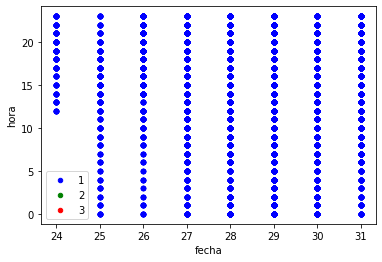

In [ ]:
#visitas por hora en los dias del mes de octubre
fig = df_e_visitors_oct[df_e_visitors_oct['branch_office']==1].plot(kind='scatter',x='day_tz',y='hour_tz',color='blue',label='1')
df_e_visitors_oct[df_e_visitors_oct['branch_office']==2].plot(kind='scatter',x='day_tz',y='hour_tz',color='green',label='2',ax=fig)
df_e_visitors_oct[df_e_visitors_oct['branch_office']==3].plot(kind='scatter',x='day_tz',y='hour_tz',color='red',label='3',ax=fig)

fig.set_xlabel('fecha')
fig.set_ylabel('hora')
plt.show()

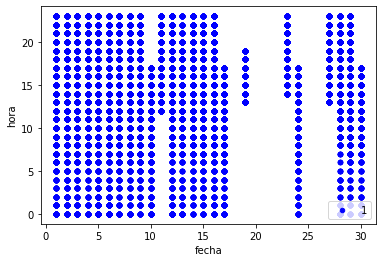

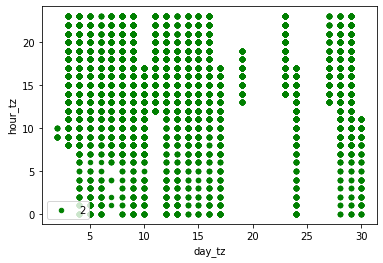

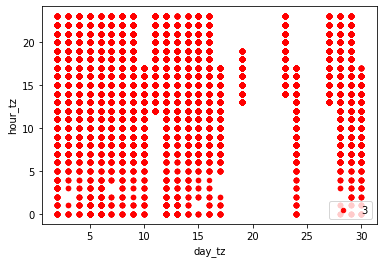

In [ ]:
#visitas por hora en los dias del mes de noviembre
fig = df_e_visitors_nov[df_e_visitors_nov['branch_office']==1].plot(kind='scatter',x='day_tz',y='hour_tz',color='blue',label='1')
df_e_visitors_nov[df_e_visitors_nov['branch_office']==2].plot(kind='scatter',x='day_tz',y='hour_tz',color='green',label='2')
df_e_visitors_nov[df_e_visitors_nov['branch_office']==3].plot(kind='scatter',x='day_tz',y='hour_tz',color='red',label='3') #,ax=fig

fig.set_xlabel('fecha')
fig.set_ylabel('hora')
plt.show()

In [ ]:
############################################################################################
#falta viernes 18, domingo 20, lunes 21, martes 22,viernes 25, sabado 26
#Buen fin del 18 al 21 de nov 2016 (+1 dia encaja), 
#Blackfriday 25 de nov 2016 (+1 dia encaja),
#Cybermonday 28 de nov 2016 (no identificado aqui)

#############################################################################################

In [ ]:
#La explicacion a la gran cobertura/popularidad que tuvo noviembre fue por tener mas dias registrados 

In [ ]:
#Cuantos nos visitan?

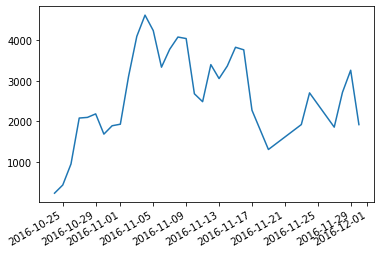

In [ ]:
df_e_visitors['Date'].value_counts().plot()

In [ ]:
df_e_visitors['Date'].value_counts()

2016-11-04    4606
2016-11-05    4227
2016-11-03    4086
2016-11-08    4069
2016-11-09    4032
2016-11-15    3818
2016-11-07    3770
2016-11-16    3756
2016-11-12    3393
2016-11-14    3358
2016-11-06    3330
2016-11-29    3255
2016-11-02    3106
2016-11-13    3051
2016-11-28    2712
2016-11-24    2700
2016-11-10    2678
2016-11-11    2484
2016-11-17    2275
2016-10-29    2185
2016-10-28    2099
2016-10-27    2083
2016-11-01    1932
2016-11-23    1923
2016-11-30    1922
2016-10-31    1894
2016-11-27    1860
2016-10-30    1689
2016-11-19    1312
2016-10-26     957
2016-10-25     441
2016-10-24     241
Name: Date, dtype: int64

In [ ]:
#en promedio nos visitan al dia
df_e_visitors['Date'].value_counts().mean()

2663.875

In [ ]:
#En octubre nos visitan asi...
df_e_visitors_oct.describe()

,branch_office,month_tz,day_tz,hour_tz,tiempodeses
count,11589.0,11589.0,11589.000000,11589.000000,11589.000000
mean,1.0,10.0,28.428078,13.640780,7305.609975
std,0.0,0.0,1.801298,5.854079,15329.060544
min,1.0,10.0,24.000000,0.000000,0.000000
25%,1.0,10.0,27.000000,10.000000,245.000000
50%,1.0,10.0,28.000000,14.000000,1222.000000
75%,1.0,10.0,30.000000,18.000000,5301.000000
max,1.0,10.0,31.000000,23.000000,68062.000000


In [ ]:
(7305/60)/60 #en promedio 2 hr

2.029166666666667

In [ ]:
(68062/60)/60 # pero hay quien ha llegado a pasar 19 hrs

18.90611111111111

In [ ]:
#En noviembre nos visitan asi...
df_e_visitors_nov.describe()

,branch_office,month_tz,day_tz,hour_tz,tiempodeses
count,73655.000000,73655.0,73655.000000,73655.000000,73655.000000
mean,1.908587,11.0,12.556853,13.918811,6886.815844
std,0.898776,0.0,8.412823,5.314826,12097.938514
min,1.000000,11.0,1.000000,0.000000,0.000000
25%,1.000000,11.0,6.000000,10.000000,394.000000
50%,2.000000,11.0,11.000000,14.000000,1672.000000
75%,3.000000,11.0,16.000000,18.000000,7145.500000
max,3.000000,11.0,30.000000,23.000000,64460.000000


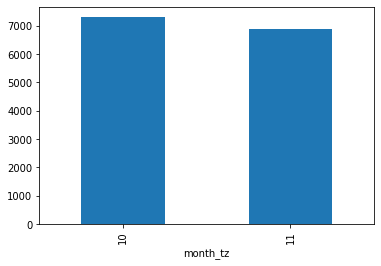

In [ ]:
#En tiempo promedio de visita se parecen los dos meses
df_e_visitors.groupby('month_tz').mean()["tiempodeses"].plot(kind='bar')

In [ ]:
#quien es ese que ha pasado casi 18hrs en tienda?
(64460/60)/60

17.905555555555555

In [ ]:
#todo ese tiempo quien lo consume?
#acaso las terminales de pago con tarjeta se la pasan prendidas conectadas a internet?

In [ ]:
#retomando una singularidad en los datos de MAC ADDRESS
#444 datos que llegan a consumir 1 hr a 19 hrs en promedio 14 hrs.

In [ ]:
df_e_visitors_lon = df_e_visitors.loc[df_e_visitors['device_mac'] == 'lon']
df_e_visitors_lon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 249111 to 249555
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device_mac      444 non-null    object        
 1   branch_office   444 non-null    int64         
 2   month_tz        444 non-null    int64         
 3   day_tz          444 non-null    int64         
 4   day_of_week_tz  444 non-null    object        
 5   hour_tz         444 non-null    int64         
 6   visitor         444 non-null    bool          
 7   tiempodeses     444 non-null    int64         
 8   Date            444 non-null    datetime64[ns]
 9   DateTime        444 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(5), object(2)
memory usage: 35.1+ KB


In [ ]:
df_e_visitors_lon.describe()

,branch_office,month_tz,day_tz,hour_tz,tiempodeses
count,444.0,444.000000,444.000000,444.000000,444.000000
mean,1.0,10.781532,16.236486,11.950450,50435.049550
std,0.0,0.413673,10.267106,6.734385,18461.423412
min,1.0,10.000000,1.000000,0.000000,3351.000000
25%,1.0,11.000000,7.000000,6.000000,38642.000000
50%,1.0,11.000000,14.000000,12.000000,62588.000000
75%,1.0,11.000000,27.000000,18.000000,64413.000000
max,1.0,11.000000,31.000000,23.000000,68054.000000


In [ ]:
df_e_visitors_lon.agg(['count', 'size', 'nunique','unique'])

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses,Date,DateTime
count,444,444,444,444,444,444,444,444,444,444
size,444,444,444,444,444,444,444,444,444,444
nunique,1,1,2,26,7,24,1,58,30,444
unique,[lon],[1],"[10, 11]","[26, 27, 28, 29, 30, 31, 1, 2, 3, 4, 5, 6, 7, ...","[Wednesday, Thursday, Friday, Saturday, Sunday...","[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0...",[True],"[19822, 18266, 68006, 18221, 68046, 18228, 680...","[2016-10-26T00:00:00.000000000, 2016-10-27T00:...","[2016-10-26T13:00:00.000000000, 2016-10-26T14:..."


In [ ]:
#df_e_visitors_lon.tail()

In [ ]:
df_e_visitors_NoLon = df_e_visitors.loc[df_e_visitors['device_mac'] != 'lon']
df_e_visitors_NoLon_oct = df_e_visitors_NoLon.loc[df_e_visitors_NoLon['month_tz'] == 10]
df_e_visitors_NoLon_nov = df_e_visitors_NoLon.loc[df_e_visitors_NoLon['month_tz'] == 11]

In [ ]:
df_e_visitors_NoLon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84800 entries, 0 to 249110
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device_mac      84800 non-null  object        
 1   branch_office   84800 non-null  int64         
 2   month_tz        84800 non-null  int64         
 3   day_tz          84800 non-null  int64         
 4   day_of_week_tz  84800 non-null  object        
 5   hour_tz         84800 non-null  int64         
 6   visitor         84800 non-null  bool          
 7   tiempodeses     84800 non-null  int64         
 8   Date            84800 non-null  datetime64[ns]
 9   DateTime        84800 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(5), object(2)
memory usage: 6.6+ MB


In [ ]:
df_e_visitors_NoLon.describe()

,branch_office,month_tz,day_tz,hour_tz,tiempodeses
count,84800.000000,84800.000000,84800.000000,84800.000000,84800.000000
mean,1.789175,10.864481,14.706592,13.891120,6716.037417
std,0.892115,0.342279,9.544591,5.382432,12145.761717
min,1.000000,10.000000,1.000000,0.000000,0.000000
25%,1.000000,11.000000,7.000000,10.000000,365.000000
50%,1.000000,11.000000,13.000000,14.000000,1585.000000
75%,3.000000,11.000000,24.000000,18.000000,6751.250000
max,3.000000,11.000000,31.000000,23.000000,68062.000000


In [ ]:
#df_e_visitors_NoLon.tail()

In [ ]:
#df_e_visitors_NoLon.agg(['count', 'size', 'nunique','unique'])

In [ ]:
#df_e_visitors_NoLon.groupby('branch_office').max()["tiempodeses"].plot(kind='bar')

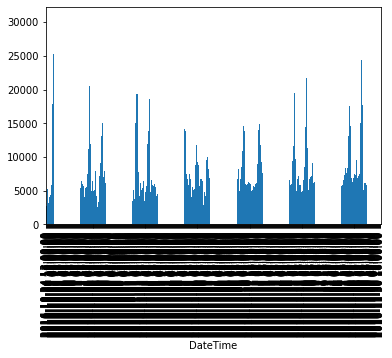

In [ ]:
#existen horas que marcan picos de consumo/tiempo de visita
df_e_visitors_NoLon.groupby('DateTime',sort=True).mean()["tiempodeses"].plot(kind='bar')


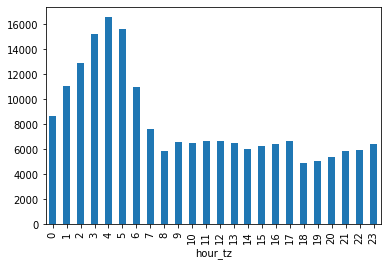

In [ ]:
#Esos picos pasan en la madrugada; comenzand oel aumento desde las 23 hrs hasta las 4 hrs y comienza descenso hasta regularizarse desde las 8 hrs
df_e_visitors_NoLon.groupby('hour_tz',sort=True).mean()["tiempodeses"].plot(kind='bar')

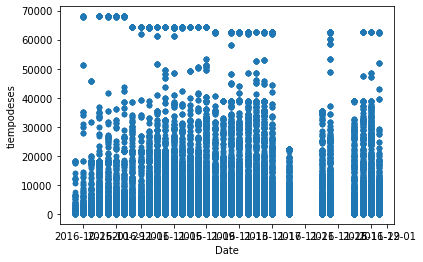

In [ ]:
#df_e_visitors_NoLon.groupby('DateTime').mean()
df_e_visitors_NoLon.plot(x='Date',y="tiempodeses",kind="scatter")


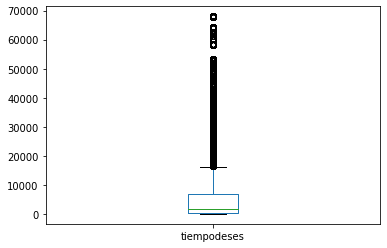

In [ ]:
df_e_visitors_NoLon['tiempodeses'].plot(kind="box")

In [ ]:
#df_e_visitors_NoLon.groupby('day_of_week_tz').max()["tiempodeses"].plot(kind='bar')

In [ ]:
#df_e_visitors_NoLon.groupby('branch_office').max()

In [ ]:
#df_e_visitors_NoLon_oct.groupby('branch_office').min()

In [ ]:
df_e_visitors_NoLon_nov.groupby('branch_office').max()
#~18hrs

,device_mac,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses,Date,DateTime
branch_office,,,,,,,,,
1,fe:fe:db:37:6b:67,11,30,Wednesday,23,True,64458,2016-11-30,2016-11-30 17:00:00
2,fe:eb:3c:72:fc:6f,11,30,Wednesday,23,True,64424,2016-11-30,2016-11-30 11:00:00
3,fe:d8:97:cd:5f:df,11,30,Wednesday,23,True,64443,2016-11-30,2016-11-30 17:00:00


In [ ]:
#Acotar valores al quitar valores extremos de tiempo de sesion por sucursal por mes (superior)
#df_e_visitors_NoLon_NoEnds = df_e_visitors_NoLon.loc[df_e_visitors_NoLon['tiempodeses'] != 64458] #Mayor de Suc1 Nov
#df_e_visitors_NoLon_NoEnds = df_e_visitors_NoLon_NoEnds.loc[df_e_visitors_NoLon_NoEnds['tiempodeses'] != 64424] #Mayor de Suc2 Nov
#df_e_visitors_NoLon_NoEnds = df_e_visitors_NoLon_NoEnds.loc[df_e_visitors_NoLon_NoEnds['tiempodeses'] != 64443] #Mayor de Suc3 Nov
#df_e_visitors_NoLon_NoEnds = df_e_visitors_NoLon_NoEnds.loc[df_e_visitors_NoLon_NoEnds['tiempodeses'] <= 68000] #Mayor de Suc1 Oct


#df_e_visitors_NoLon_NoEnds = df_e_visitors_NoLon.loc[df_e_visitors_NoLon['device_mac'] != 'fe:fe:db:37:6b:67'] 
#df_e_visitors_NoLon_NoEnds = df_e_visitors_NoLon.loc[df_e_visitors_NoLon['device_mac'] != 'fe:eb:3c:72:fc:6f'] 
#df_e_visitors_NoLon_NoEnds = df_e_visitors_NoLon.loc[df_e_visitors_NoLon['device_mac'] != 'fe:d8:97:cd:5f:df'] 
df_e_visitors_NoLon_NoEnds = df_e_visitors_NoLon.loc[df_e_visitors_NoLon['tiempodeses'] <= 8000] #mayor : 8000s ~ 2.2 hrs

#Acotar valores al quitar valores extremos de tiempo de sesion por sucursal por mes (inferior)
df_e_visitors_NoLon_NoEnds = df_e_visitors_NoLon_NoEnds.loc[df_e_visitors_NoLon_NoEnds['tiempodeses'] != 0]



df_e_visitors_NoLon_NoEnds_oct = df_e_visitors_NoLon_NoEnds.loc[df_e_visitors_NoLon_NoEnds['month_tz'] == 10]
df_e_visitors_NoLon_NoEnds_nov = df_e_visitors_NoLon_NoEnds.loc[df_e_visitors_NoLon_NoEnds['month_tz'] == 11]

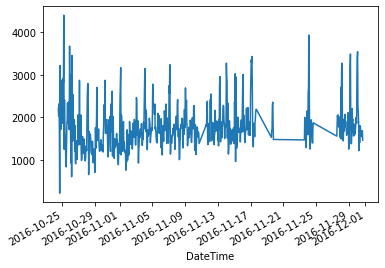

In [ ]:
df_e_visitors_NoLon_NoEnds.groupby('DateTime').mean()["tiempodeses"].plot()

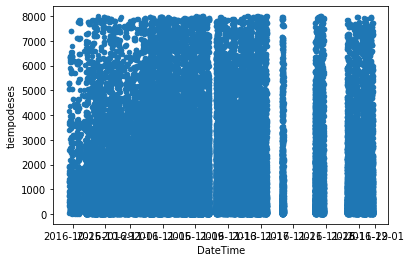

In [ ]:

df_e_visitors_NoLon_NoEnds.plot(x='DateTime',y="tiempodeses",kind="scatter")

In [ ]:
df_e_visitors_NoLon_NoEnds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65487 entries, 0 to 249110
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device_mac      65487 non-null  object        
 1   branch_office   65487 non-null  int64         
 2   month_tz        65487 non-null  int64         
 3   day_tz          65487 non-null  int64         
 4   day_of_week_tz  65487 non-null  object        
 5   hour_tz         65487 non-null  int64         
 6   visitor         65487 non-null  bool          
 7   tiempodeses     65487 non-null  int64         
 8   Date            65487 non-null  datetime64[ns]
 9   DateTime        65487 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(5), object(2)
memory usage: 5.1+ MB


In [ ]:
df_e_visitors_NoLon_NoEnds.describe()

,branch_office,month_tz,day_tz,hour_tz,tiempodeses
count,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000
mean,1.788111,10.859606,14.678837,13.974254,1671.085177
std,0.905651,0.347398,9.609331,5.273949,1912.048797
min,1.000000,10.000000,1.000000,0.000000,1.000000
25%,1.000000,11.000000,6.000000,10.000000,243.000000
50%,1.000000,11.000000,13.000000,14.000000,908.000000
75%,3.000000,11.000000,25.000000,18.000000,2394.000000
max,3.000000,11.000000,31.000000,23.000000,7999.000000


In [ ]:
df_e_visitors_NoLon_NoEnds.groupby('branch_office').max()

,device_mac,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses,Date,DateTime
branch_office,,,,,,,,,
1,fe:fe:db:37:6b:67,11,31,Wednesday,23,True,7998,2016-11-30,2016-11-30 17:00:00
2,fe:eb:3c:72:fc:6f,11,30,Wednesday,23,True,7999,2016-11-30,2016-11-30 11:00:00
3,fe:d8:97:cd:5f:df,11,30,Wednesday,23,True,7997,2016-11-30,2016-11-30 17:00:00


In [ ]:

#fe:eb:3c:72:fc:6f sospechosos de ser siempre los mas altos
#fe:d8:97:cd:5f:df

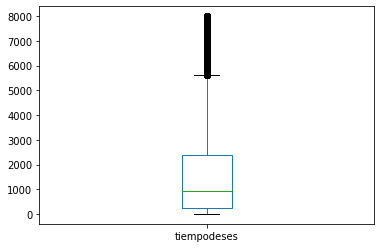

In [ ]:
df_e_visitors_NoLon_NoEnds['tiempodeses'].plot(kind="box")

In [ ]:
df_e_visitors_NoLon_NoEnds_oct.groupby('branch_office').mean()

,month_tz,day_tz,hour_tz,visitor,tiempodeses
branch_office,,,,,
1,10.0,28.412225,13.891777,True,1422.42332


In [ ]:
df_e_visitors_NoLon_NoEnds_nov.groupby('branch_office').mean()

,month_tz,day_tz,hour_tz,visitor,tiempodeses
branch_office,,,,,
1,11.0,11.539509,13.649329,True,1449.791830
2,11.0,13.385852,14.106735,True,2128.389134
3,11.0,13.135964,14.351038,True,1858.808865


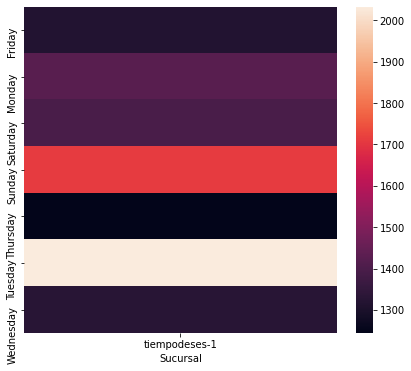

In [ ]:
df_e_FechasHoras = df_e_visitors_NoLon_NoEnds_oct[['branch_office','day_of_week_tz','tiempodeses']].groupby(['branch_office','day_of_week_tz']).mean()
df_e_FechasHoras = df_e_FechasHoras.unstack(level=0)

fig, ax = plt.subplots(figsize=(7, 6))
sb.heatmap(df_e_FechasHoras)
# axis labels
plt.xlabel('Sucursal')
plt.ylabel('')

plt.show()
#de 21 min a 33 min
#pasan los visitantes de la sucursal 1 en octubre

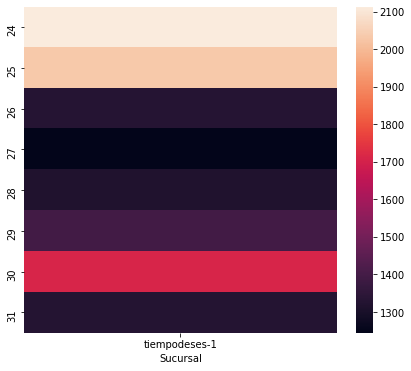

In [ ]:
df_e_FechasHoras = df_e_visitors_NoLon_NoEnds_oct[['branch_office','day_tz','tiempodeses']].groupby(['branch_office','day_tz']).mean()
df_e_FechasHoras = df_e_FechasHoras.unstack(level=0)

fig, ax = plt.subplots(figsize=(7, 6))
sb.heatmap(df_e_FechasHoras)
# axis labels
plt.xlabel('Sucursal')
plt.ylabel('')

plt.show()
#de 21 min a 33 min
#pasan los visitantes de la sucursal 1 en octubre

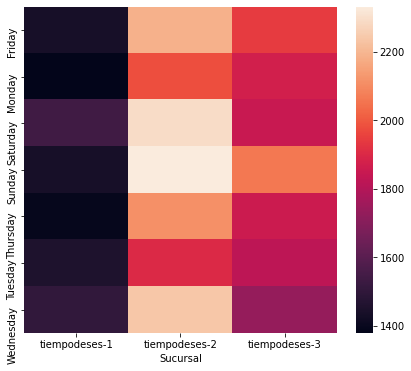

In [ ]:
df_e_FechasHoras = df_e_visitors_NoLon_NoEnds_nov[['branch_office','day_of_week_tz','tiempodeses']].groupby(['branch_office','day_of_week_tz']).mean()
df_e_FechasHoras = df_e_FechasHoras.unstack(level=0)

fig, ax = plt.subplots(figsize=(7, 6))
sb.heatmap(df_e_FechasHoras)
# axis labels
plt.xlabel('Sucursal')
plt.ylabel('')

plt.show()
#de 23 min a 37 min

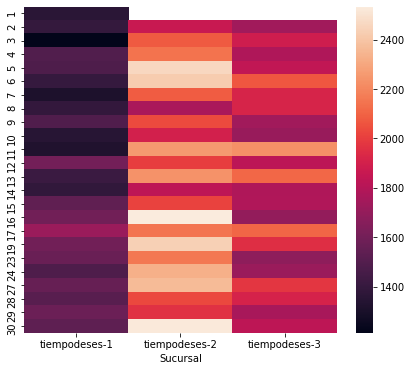

In [ ]:
df_e_FechasHoras = df_e_visitors_NoLon_NoEnds_nov[['branch_office','day_tz','tiempodeses']].groupby(['branch_office','day_tz']).mean()
df_e_FechasHoras = df_e_FechasHoras.unstack(level=0)

fig, ax = plt.subplots(figsize=(7, 6))
sb.heatmap(df_e_FechasHoras)
# axis labels
plt.xlabel('Sucursal')
plt.ylabel('')

plt.show()
#de 23 min a 37 min
#pasan los visitantes de la sucursal 1, 2, 3 en nov

In [ ]:
#df_e_visitors_NoLon_NoEnds_nov[['branch_office','day_tz','tiempodeses']].groupby(['branch_office','day_tz']).mean()

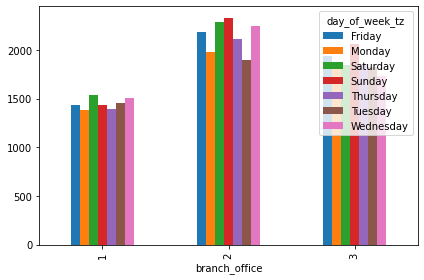

In [ ]:
tiempo_visita_sucursal = df_e_visitors_NoLon_NoEnds_nov.groupby(['branch_office', 'day_of_week_tz']).mean()["tiempodeses"].unstack()
# genera el gráfico:
tiempo_visita_sucursal.plot(kind="bar")
plt.tight_layout()  # tip(!)

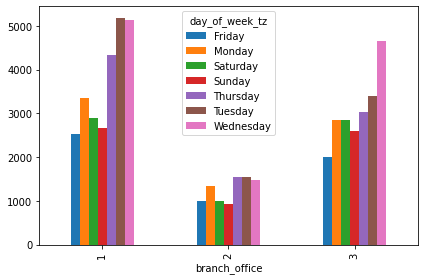

In [ ]:
numero_visitas_sucursal = df_e_visitors_NoLon_NoEnds_nov.groupby(['branch_office', 'day_of_week_tz']).count()['visitor'].unstack()
# genera el gráfico:
numero_visitas_sucursal.plot(kind="bar")
plt.tight_layout()  # tip(!)

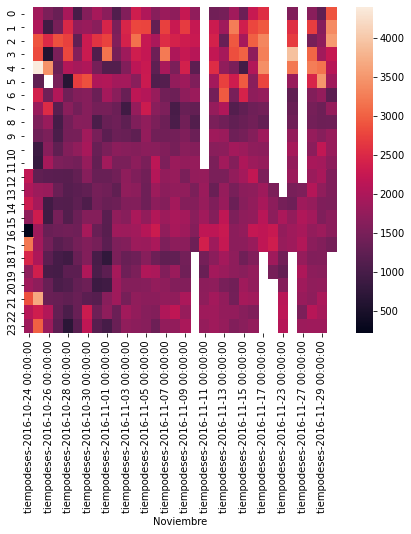

In [ ]:
df_e_FechasHoras = df_e_visitors_NoLon_NoEnds[['Date','hour_tz','tiempodeses']].groupby(['Date','hour_tz']).mean()
df_e_FechasHoras = df_e_FechasHoras.unstack(level=0)

fig, ax = plt.subplots(figsize=(7, 6))
sb.heatmap(df_e_FechasHoras)
# axis labels
plt.xlabel('Noviembre')
plt.ylabel('')

plt.show()

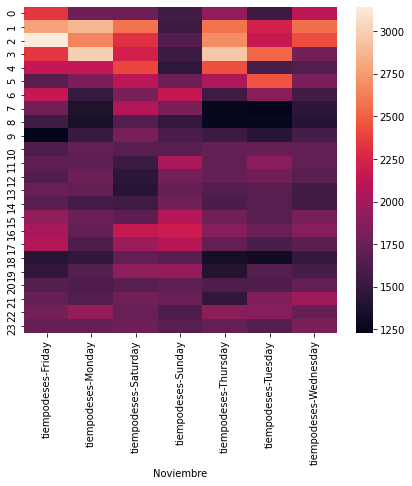

In [ ]:
df_e_DiasHoras = df_e_visitors_NoLon_NoEnds_nov[['day_of_week_tz','hour_tz','tiempodeses']].groupby(['day_of_week_tz','hour_tz']).mean()
df_e_DiasHoras = df_e_DiasHoras.unstack(level=0)

fig, ax = plt.subplots(figsize=(7, 6))
sb.heatmap(df_e_DiasHoras)
# axis labels
plt.xlabel('Noviembre')
plt.ylabel('')

plt.show()

In [ ]:
#df_e_visitors_NoLon_NoEnds_nov.agg(['count', 'size', 'nunique','mean'])

In [ ]:
#En tiempo promedio de visita 
#df_e_visitors_NoLon_NoEnds_nov.groupby('device_mac').mean()["tiempodeses"].plot(kind='bar')
####tarda en cargar

In [ ]:
df_e_visitors_NoLon_NoEnds_nov.groupby('device_mac').mean()["tiempodeses"].mean() #17min

1050.4953302153551

In [ ]:
#El numero promedio de visitas reincidentes
#numero_visitas_sucursal = df_e_visitors_NoLon_NoEnds_nov.groupby(['device_mac']).count()['visitor']
#numero_visitas_sucursal.plot(kind="bar")
#plt.tight_layout()  # tip(!)
######tarda en cargar

In [ ]:
df_e_visitors_NoLon_NoEnds_nov.groupby(['device_mac']).count()['visitor'].agg(['max','min','mean'])

max     206.000000
min       1.000000
mean      2.395141
Name: visitor, dtype: float64

#2. Etiquetado

In [ ]:
#Librerias
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Creamos el "codificador" indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Monday', 
                                      'Tuesday', 
                                      'Wednesday', 
                                      'Thursday', 
                                      'Friday', 
                                      'Saturday',
                                      'Sunday']])

# Ajustamos el "codificador" con la variable de dias de la semana y la transformamos
encoder.fit(df_e[['day_of_week_tz']])
df_e['day_of_week_tz-encoded'] = encoder.transform(df_e[["day_of_week_tz"]])

In [ ]:
#df_e.head()

In [ ]:
#Separamos las etiquetas de visitante de los datos
X = np.array(df_e[['branch_office','month_tz','day_tz','hour_tz','tiempodeses','day_of_week_tz-encoded']])
y = np.array(df_e['visitor'])

In [ ]:
#Dividimos el conjunto de datos 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0],X_test.shape[0]))

Son 199644 datos para entrenamiento y 49912 datos para prueba


In [ ]:
199644 + 49912 

249556

<h3>Regresion logistica</h3>

In [ ]:
regresionLog = LogisticRegression()
regresionLog.fit(X_train,y_train)
Y_pred = regresionLog.predict(X_test)
print('Precision de regresion logistica: {}'.format(regresionLog.score(X_train,y_train)))

Precision de regresion logistica: 0.9631494059425778


In [ ]:
regresionLog.score(X_test,y_test)

0.961291873697708

<h3>SVM</h3>

In [ ]:
#Se tarda

In [ ]:
maquina = SVC()
maquina.fit(X_train,y_train)
Y_pred = maquina.predict(X_test)
print('Precision de maquina de vectores de soporte: {}'.format(maquina.score(X_train,y_train)))

Precision de maquina de vectores de soporte: 0.9604095289615515


In [ ]:
maquina.score(X_test,y_test)

0.9593885238018913

<h3>K vecinos mas cercanos </h3>

In [ ]:
vecino = KNeighborsClassifier(n_neighbors=3)
vecino.fit(X_train,y_train)
Y_pred = vecino.predict(X_test)
print('Precision de vecinos mas cercanos: {}'.format(vecino.score(X_train,y_train)))

Precision de vecinos mas cercanos: 0.9761575604576146


In [ ]:
vecino.score(X_test,y_test)

0.9557220708446866

<h3>Arboles de decision

In [ ]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train,y_train)
Y_pred = arbol.predict(X_test)
print('Precision de arboles de decision: {}'.format(arbol.score(X_train,y_train)))

Precision de arboles de decision: 0.9938089799843722


In [ ]:
arbol.score(X_test,y_test)

0.952235935246033

In [ ]:
#Arboles   .993  <------------ ok
#KVecinos  .976
#SVM       .969
#Regresion .963

In [ ]:
#tarda muuuucho mas

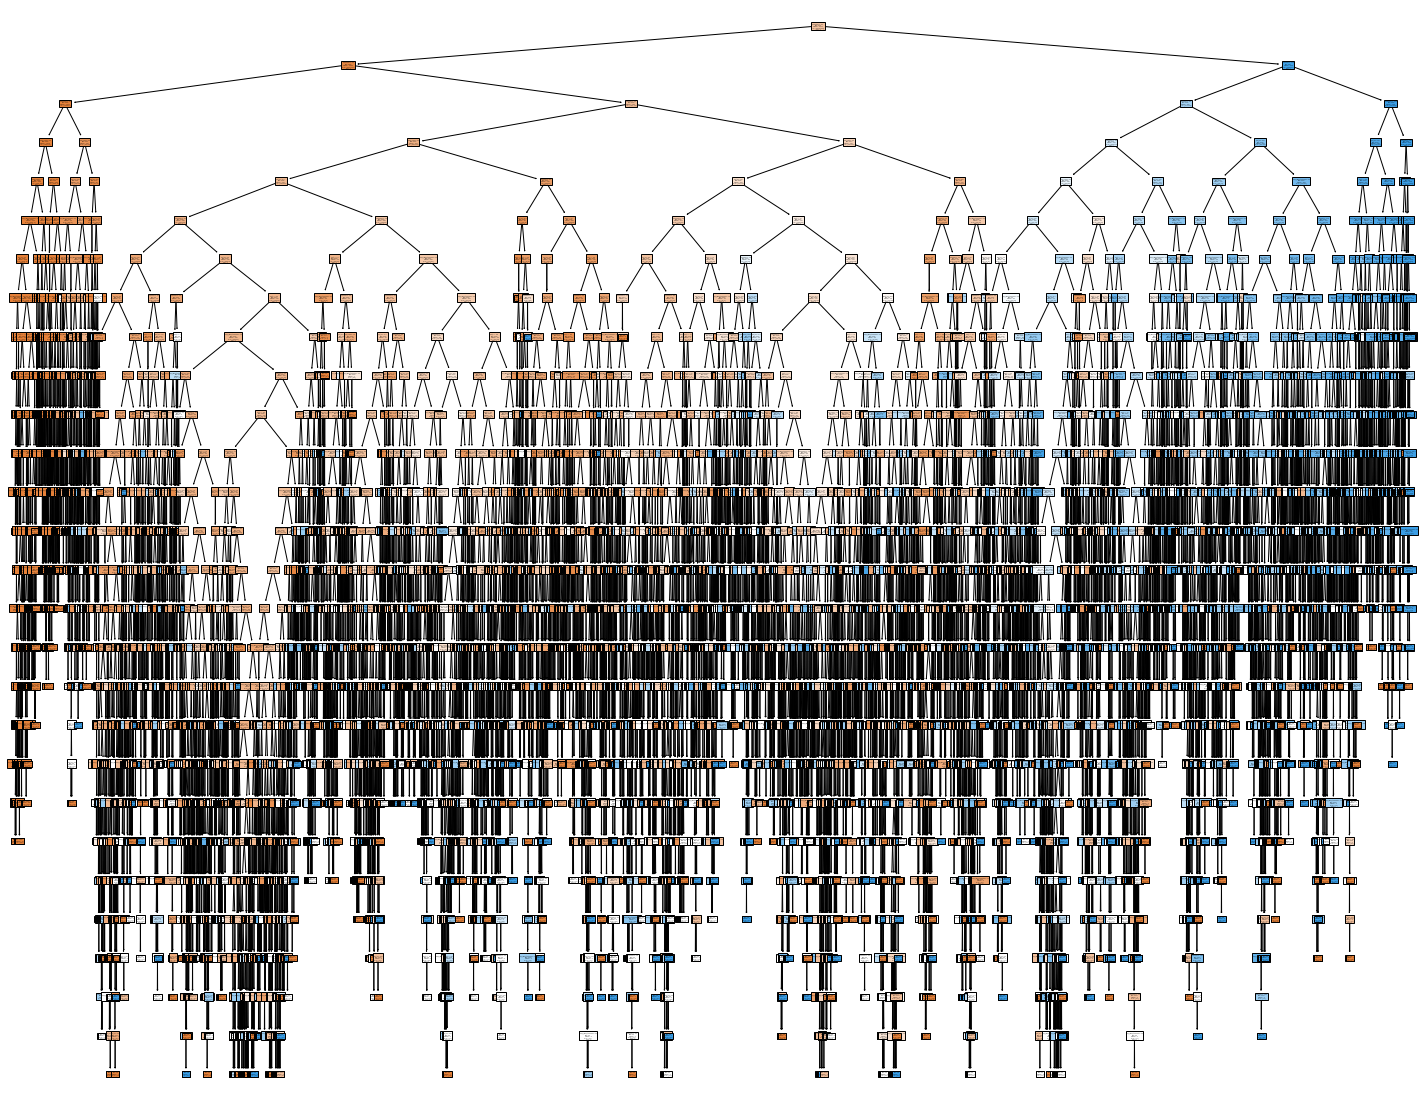

In [ ]:



fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(arbol, 
                   feature_names=['branch_office','month_tz','day_tz','hour_tz','tiempodeses','day_of_week_tz-encoded'],  
                   class_names='visitor',
                   filled=True)



In [ ]:
fig.savefig("decistion_tree.png")

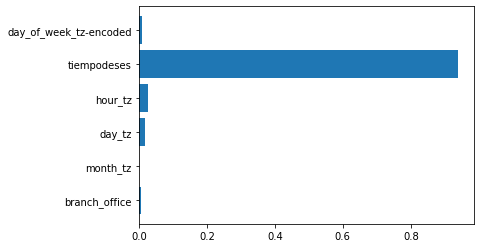

In [ ]:
caract=6
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),['branch_office','month_tz','day_tz','hour_tz','tiempodeses','day_of_week_tz-encoded'])
plt.show()

In [ ]:
arbol.tree_.max_depth

27

In [ ]:
arbol=DecisionTreeClassifier(max_depth=27)

In [ ]:
arbol.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=27, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h3>Etiquetemos</h3>

In [ ]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      90000 non-null  int64 
 1   device_mac      90000 non-null  object
 2   branch_office   90000 non-null  int64 
 3   month_tz        90000 non-null  int64 
 4   day_tz          90000 non-null  int64 
 5   day_of_week_tz  90000 non-null  object
 6   hour_tz         90000 non-null  int64 
 7   tiempodeses     90000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 5.5+ MB


In [ ]:
#Ajustamos el "codificador" con la variable de dias de la semana y la transformamos
encoder.fit(df_v[['day_of_week_tz']])
df_v['day_of_week_tz-encoded'] = encoder.transform(df_v[["day_of_week_tz"]])

In [ ]:
df_v.head()

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses,day_of_week_tz-encoded
0,1,a8:81:95:56:31:3c,1,11,17,Thursday,4,0,3.0
1,2,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,3.0
2,3,0c:b3:19:10:78:17,3,11,12,Saturday,10,0,5.0
3,4,44:74:6c:0a:20:23,3,11,27,Sunday,21,0,6.0
4,5,ac:5f:3e:c8:dc:35,1,11,27,Sunday,16,0,6.0


In [ ]:
#Separamos las etiquetas de visitante de los datos
X = np.array(df_v[['branch_office','month_tz','day_tz','hour_tz','tiempodeses','day_of_week_tz-encoded']])

In [ ]:
Y_pred = arbol.predict(X)

In [ ]:
df_v['visitor']=Y_pred

In [ ]:
df_v.head()

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses,day_of_week_tz-encoded,visitor
0,1,a8:81:95:56:31:3c,1,11,17,Thursday,4,0,3.0,False
1,2,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,3.0,True
2,3,0c:b3:19:10:78:17,3,11,12,Saturday,10,0,5.0,False
3,4,44:74:6c:0a:20:23,3,11,27,Sunday,21,0,6.0,False
4,5,ac:5f:3e:c8:dc:35,1,11,27,Sunday,16,0,6.0,False


In [ ]:
df_v.to_csv('v_etiquetado.csv', index=False)

In [ ]:
####LISTO!!####

#ignore

In [ ]:
#################################################################################################################3

In [ ]:

#df_e_visitors_oct.groupby(["day_tz", "day_of_week_tz"])[["visitor"]].agg([np.mean,np.count_nonzero])

In [ ]:
#df_e_visitors_oct.groupby([ "day_of_week_tz","hour_tz"])[["tiempodeses"]].agg([np.mean,np.count_nonzero])